**Anayzing National University Rankings**

This notebook analyzes the tuition and enrollment information available for ~230 school. Our goal is to see if there are any patterns between the number of students enrolled and the tuition of the school. For example, is it more costly to attend a school with a lower student body relative to others. We also take a look at the regions that these schools are located to see if there is a correlation between region and cost.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/national-universities-rankings-explore-quality-t/National Universities Rankings.csv


In [2]:
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter


In [3]:
#Create df of university csv
#Print out first 5 rows

uni_ranks = pd.read_csv('/kaggle/input/national-universities-rankings-explore-quality-t/National Universities Rankings.csv')
uni_ranks.head()

,index,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment
0,0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...","$45,320",NaN,"5,402"
1,1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...","$47,074",NaN,"6,699"
2,2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...","$52,491",NaN,"5,844"
3,3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...","$49,480",NaN,"5,532"
4,4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...","$55,056",NaN,"6,102"


In [4]:
#Remove $ and ',' from tuition, in-state, and enrollment columns
#Split out location into city and state
cols_to_clean = ['Tuition and fees', 'In-state', 'Undergrad Enrollment']
uni_ranks[cols_to_clean] = uni_ranks[cols_to_clean].apply(lambda x: x.str.replace('$',''))
uni_ranks[cols_to_clean] = uni_ranks[cols_to_clean].apply(lambda x: x.str.replace(',',''))
uni_ranks[['City','State']]= uni_ranks['Location'].str.split(',', expand = True)
uni_ranks.iloc[:3]

,index,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment,City,State
0,0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...",45320,NaN,5402,Princeton,NJ
1,1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...",47074,NaN,6699,Cambridge,MA
2,2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...",52491,NaN,5844,Chicago,IL


In [5]:
#Filter out for only NJ states as a test
uni_test = uni_ranks[uni_ranks['State']== 'NJ']
uni_test.head()

,index,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment,City,State


In [6]:
#Remove any whitespace that may cause error in object dtypes
#test filter shows no returns for filtering for strings
cols_to_strip = ['Name', 'Description','City','State']
uni_ranks[cols_to_strip] = uni_ranks[cols_to_strip].apply(lambda x: x.str.strip())

In [7]:
#Test NJ filter to see if values are returned
uni_strip_test = uni_ranks[uni_ranks['State']== 'NJ']
uni_strip_test.head()

,index,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment,City,State
0,0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...",45320,NaN,5402,Princeton,NJ
69,69,Rutgers University--New Brunswick,"Piscataway, NJ",70,For high school students who can't decide what...,30023,14372,35484,Piscataway,NJ
71,71,Stevens Institute of Technology,"Hoboken, NJ",71,Innovation and entrepreneurship is stressed at...,48838,NaN,2873,Hoboken,NJ
118,118,Seton Hall University,"South Orange, NJ",118,"Seton Hall University is a private, Catholic s...",39258,NaN,6090,South Orange,NJ
137,137,New Jersey Institute of Technology,"Newark, NJ",135,"Founded in 1881, New Jersey Institute of Techn...",30326,16108,8008,Newark,NJ


In [8]:
#Create lists for individual regions to categorize states into their respective regions
Northeast = ['CT','DE','ME', 'MD',
            'MA','NH','NJ','NY',
            'PA','RI','VT', 'DC']
South = ['AL', 'AR', 'TX', 'OK',
        'FL','GA','KY','LA','MS',
        'NC','OK','SC','TN', 'VA',
        'WV']
Midwest = ['IL','IN','IA','KS',
          'MI','MN','MO','NE',
          'ND','OH','SD','WI']
West = ['AK', 'AZ', 'NM', 'CA',
       'CO','HI','ID','MT','NV',
       'OR','UT', 'WA', 'WY']

In [9]:
#Create dictionary from state lists into regions
regions = {}
for key in Northeast:
    regions[key] = 'Northeast'
for key in South:
    regions[key] = 'South'
for key in Midwest:
    regions[key] = 'Midwest'
for key in West:
    regions[key] = 'West'

In [10]:
#Map regions to respective states in uni by state df
uni_ranks['Region'] = uni_ranks['State'].map(regions)
uni_ranks.head()

,index,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment,City,State,Region
0,0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...",45320,NaN,5402,Princeton,NJ,Northeast
1,1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...",47074,NaN,6699,Cambridge,MA,Northeast
2,2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...",52491,NaN,5844,Chicago,IL,Midwest
3,3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...",49480,NaN,5532,New Haven,CT,Northeast
4,4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...",55056,NaN,6102,New York,NY,Northeast


In [11]:
#Drop location and index column 
#Set city and state to index 2 and 3 after university name
cols_to_drop = ['index','Location']
uni_ranks.drop(cols_to_drop, axis = 1)
cols_order = ['Rank','Name', 'City', 'State','Region','Tuition and fees','In-state',
              'Undergrad Enrollment','Description']
uni_ranks = uni_ranks[cols_order]
uni_ranks.set_index('Rank')

,Name,City,State,Region,Tuition and fees,In-state,Undergrad Enrollment,Description
Rank,,,,,,,,
1,Princeton University,Princeton,NJ,Northeast,45320,NaN,5402,"Princeton, the fourth-oldest college in the Un..."
2,Harvard University,Cambridge,MA,Northeast,47074,NaN,6699,"Harvard is located in Cambridge, Massachusetts..."
3,University of Chicago,Chicago,IL,Midwest,52491,NaN,5844,"The University of Chicago, situated in Chicago..."
3,Yale University,New Haven,CT,Northeast,49480,NaN,5532,"Yale University, located in New Haven, Connect..."
5,Columbia University,New York,NY,Northeast,55056,NaN,6102,"Columbia University, located in Manhattan's Mo..."
...,...,...,...,...,...,...,...,...
220,University of Massachusetts--Dartmouth,North Dartmouth,MA,Northeast,19270,12588,7295,"Located about 60 miles south of Boston, the Un..."
220,University of Missouri--St. Louis,St. Louis,MO,Midwest,26277,10065,13569,Undergraduates at University of Missouri--St. ...
220,University of North Carolina--Greensboro,Greensboro,NC,South,21595,6733,15951,University of North Carolina--Greensboro is lo...


In [12]:
#df shape
'Data Shown as (rows, columns): ' + str(uni_ranks.shape)

'Data Shown as (rows, columns): (231, 9)'

In [13]:
#How many nulls do we have in our data?
uni_ranks.isna().sum()

Rank                     0
Name                     0
City                     0
State                    0
Region                   0
Tuition and fees         0
In-state                98
Undergrad Enrollment     0
Description              0
dtype: int64

In [14]:
#Replace null values for instate tuition with 0 assuming no information available
#Could also assume the tuition option is the same for both in and out of state students for schools with no in state information
uni_ranks['In-state'].fillna('0', inplace = True)
uni_ranks.head()

,Rank,Name,City,State,Region,Tuition and fees,In-state,Undergrad Enrollment,Description
0,1,Princeton University,Princeton,NJ,Northeast,45320,0,5402,"Princeton, the fourth-oldest college in the Un..."
1,2,Harvard University,Cambridge,MA,Northeast,47074,0,6699,"Harvard is located in Cambridge, Massachusetts..."
2,3,University of Chicago,Chicago,IL,Midwest,52491,0,5844,"The University of Chicago, situated in Chicago..."
3,3,Yale University,New Haven,CT,Northeast,49480,0,5532,"Yale University, located in New Haven, Connect..."
4,5,Columbia University,New York,NY,Northeast,55056,0,6102,"Columbia University, located in Manhattan's Mo..."


In [15]:
#df object data types
uni_ranks.dtypes

Rank                     int64
Name                    object
City                    object
State                   object
Region                  object
Tuition and fees        object
In-state                object
Undergrad Enrollment    object
Description             object
dtype: object

In [16]:
#Tuition, in state, and enrollment are being read as objects. Convert columns into ints
cols_to_convert = ['Tuition and fees', 'In-state','Undergrad Enrollment']
uni_ranks[cols_to_convert] = uni_ranks[cols_to_convert].astype(int)

uni_ranks.dtypes

Rank                     int64
Name                    object
City                    object
State                   object
Region                  object
Tuition and fees         int64
In-state                 int64
Undergrad Enrollment     int64
Description             object
dtype: object

In [17]:
#Filter out for schools that have both out of state and in state fees information
uni_instate_over0 = uni_ranks[uni_ranks['In-state'] > 0]
uni_instate_over0.head()

,Rank,Name,City,State,Region,Tuition and fees,In-state,Undergrad Enrollment,Description
21,20,University of California--Berkeley,Berkeley,CA,West,40191,13509,27496,"The University of California--Berkeley, often ..."
24,24,University of California--Los Angeles,Los Angeles,CA,West,39518,12836,29585,"The University of California--Los Angeles, com..."
25,24,University of Virginia,Charlottesville,VA,South,45066,15722,16736,"Founded by Thomas Jefferson, the University of..."
27,27,University of Michigan--Ann Arbor,Ann Arbor,MI,Midwest,43476,13856,28312,The University of Michigan boasts one of the b...
29,30,University of North Carolina--Chapel Hill,Chapel Hill,NC,South,33916,8834,18415,"The University of North Carolina--Chapel Hill,..."


In [18]:
#General Stats for both datasets
#Using uni_ranks for stats on tuition and fees, uni_instate_over0 for in-state to account for null values in in-state fields
print(uni_ranks[['Tuition and fees','Undergrad Enrollment']].describe().round(2))
print(uni_instate_over0[['In-state','Undergrad Enrollment']].describe().round(2))

       Tuition and fees  Undergrad Enrollment
count            231.00                231.00
mean           33769.25              14946.62
std            10756.73              10569.66
min             5300.00               1001.00
25%            25693.00               6238.50
50%            31608.00              12949.00
75%            42721.00              22145.50
max            55056.00              54513.00
       In-state  Undergrad Enrollment
count    133.00                133.00
mean   10895.71              20883.32
std     3038.57               9674.16
min     4965.00               1839.00
25%     8820.00              13569.00
50%    10622.00              20182.00
75%    13296.00              26590.00
max    18687.00              54513.00


In [19]:
#Average tuition and enrollment by state for all school
#Sort by highest tuition
#Print out top 5 schools with highest average tuition
uni_by_state_all = uni_ranks.groupby(['State','Region'])[cols_to_clean].mean().round(2)
uni_by_state_all.sort_values('Tuition and fees', ascending = False, inplace = True)
uni_by_state_all[:5]

,,Tuition and fees,In-state,Undergrad Enrollment
State,Region,,,
DC,Northeast,42958.80,0.00,7398.20
NH,Northeast,41431.00,8812.00,8670.50
CT,Northeast,41042.67,4688.67,9868.00
MA,Northeast,40715.33,3549.33,8733.13
VT,Northeast,40364.00,17300.00,10973.00


In [20]:
#Average tuition and enrollment by state for schools with both tuition information
#Sort by highest tuition
#Print out top 5 schools with highest average tuition
uni_by_instate = uni_instate_over0.groupby(['State','Region'])[cols_to_clean].mean().round(2)
uni_by_instate.sort_values('Tuition and fees', ascending = False, inplace = True)
uni_by_instate[:5]

,,Tuition and fees,In-state,Undergrad Enrollment
State,Region,,,
VT,Northeast,40364.00,17300.00,10973.00
CT,Northeast,35858.00,14066.00,18826.00
CA,West,34623.58,12008.58,23571.17
VA,South,34562.17,13614.17,19272.50
HI,West,33764.00,11732.00,13689.00


Text(0.5, 1.0, 'Total Tuition and Fees by Enrollment Numbers and Region')

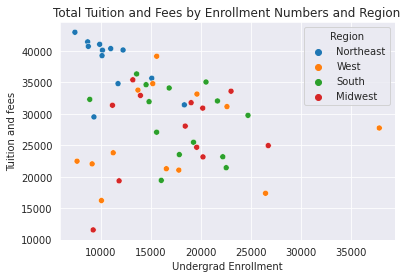

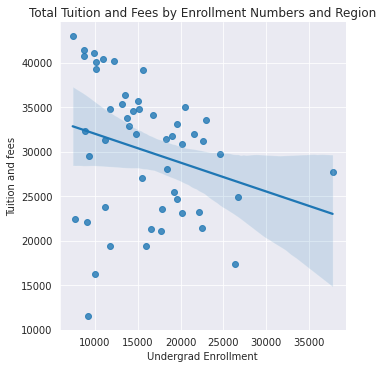

In [21]:
#Plot enrollment numbers and tuition feed, color by region for all schools
#Do we see any patterns in the tuition and fees for certain regions?
sns.scatterplot(data = uni_by_state_all, x = 'Undergrad Enrollment', y='Tuition and fees',
               hue = 'Region')
plt.title('Total Tuition and Fees by Enrollment Numbers and Region')
sns.lmplot(data = uni_by_state_all, x = 'Undergrad Enrollment', y='Tuition and fees')
plt.title('Total Tuition and Fees by Enrollment Numbers and Region')

Text(0.5, 1.0, 'In-state tuition by Enrollment Numbers and Region')

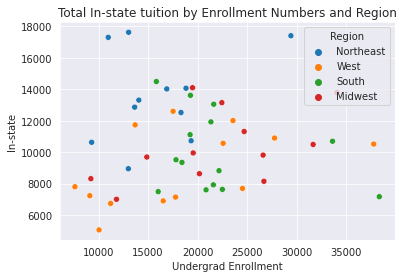

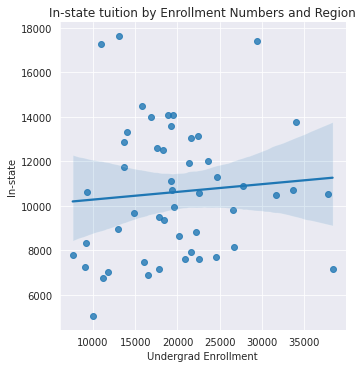

In [22]:
#Plot enrollment numbers and tuition feed, color by region for only schools with in-state information
#Do we see any patterns in the tuition and fees for certain regions?
sns.scatterplot(data = uni_by_instate, x = 'Undergrad Enrollment', y='In-state',
               hue = 'Region')
plt.title('Total In-state tuition by Enrollment Numbers and Region')
sns.lmplot(data = uni_by_instate, x = 'Undergrad Enrollment', y='In-state')
plt.title('In-state tuition by Enrollment Numbers and Region')

In [23]:
#Is there a correlation between enrollment body and tuition?
uni_by_state_all.corr()

,Tuition and fees,In-state,Undergrad Enrollment
Tuition and fees,1.000000,-0.119201,-0.260615
In-state,-0.119201,1.000000,0.269957
Undergrad Enrollment,-0.260615,0.269957,1.000000
